In [12]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax
from matplotlib.animation import FuncAnimation

In [13]:
ds = pd.read_csv('CerealCropYield_1961-2018.csv')
ds

,Country,Yield (hg/ha),Area harvested (ha)
0,Afghanistan,808952,167842553
1,Africa,692014,4829674858
2,Albania,1651049,14972582
3,Algeria,534659,158067578
4,Americas,2135761,7502921817
...,...,...,...
197,Western Sahara,351565,134081
198,Yemen,513295,51091423
199,Yugoslavia,975715,145951898
200,Zambia,929366,53467933


In [15]:
ds = ds.dropna()
ds

,Country,Yield (hg/ha),Area harvested (ha)
0,Afghanistan,808952,167842553
1,Africa,692014,4829674858
2,Albania,1651049,14972582
3,Algeria,534659,158067578
4,Americas,2135761,7502921817
...,...,...,...
197,Western Sahara,351565,134081
198,Yemen,513295,51091423
199,Yugoslavia,975715,145951898
200,Zambia,929366,53467933


In [23]:
ds =ds[['Area harvested (ha)','Yield (hg/ha)']]
ds

x= ds['Area harvested (ha)']
y= ds['Yield (hg/ha)']

Text(0, 0.5, 'yield')

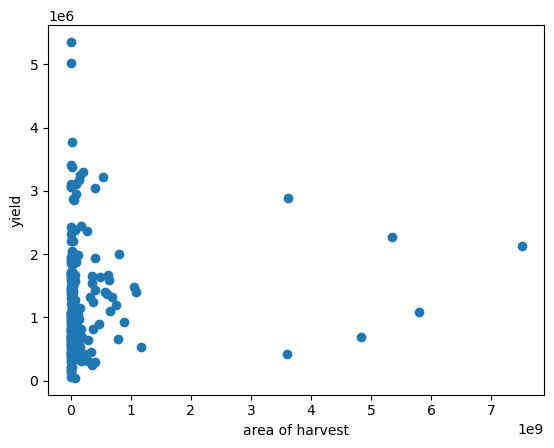

In [24]:
plt.scatter(x,y)
plt.xlabel("area of harvest")
plt.ylabel("yield")

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
X_train

183     73858004
8        4631043
192     39455091
194        71441
3      158067578
         ...    
163        62518
108     39634062
7      625029147
150    346254619
87     142002040
Name: Area harvested (ha), Length: 161, dtype: int64

In [47]:
X_train = np.array(X_train).reshape(-1,1)
X_train.flatten()

array([  73858004,    4631043,   39455091,      71441,  158067578,
         24352458,  600632941,  796116139,  325443468,  479975499,
        397890213,  160289457,  660513573,   15765731,   41420983,
          5656800,     803128,       9256, 1047555096,  119404474,
        218334898,       7833,   89315848,  568536987,    7277428,
        101104503,  794202254,   70694918,        786,   24373812,
           487194,        878,     132722,      10351,   32396143,
         16130096,  190571733,  284478491,  268794646,    3194775,
        171181920,   52343526,   19445291,   39894775,  158962771,
         48628377,       9013,   84499045,   43250490,   53448623,
           261605,  630579317,     112449,    4373698,  169680654,
            49250,     205755,  368559139,    4232358,        675,
        158870718,   86775898,   43365728,  145951898,     159067,
         23675327,    5033178,   13397927,    2724154,    8524988,
       3614603795,   47298686,   81512150,  408746127,    9580

In [46]:
 X_test = np.array(X_test).reshape(-1,1)
 X_test.flatten()

array([ 53467933,  14801816, 339665189,    134081,    110229,   6096588,
        11796653,  64627105, 167842553,  67049262,  82130297,  10096093,
        11897590, 404335674,   6434679,  29522444, 143509587,  10842718,
        26524594,  65649553,  54680713,  24213958,  17564904,    139589,
        73557625,   9157627,     94085,   6764812,  15429492,       234,
        28732125,     19321, 757447587,  23789894,  36712128,  46107546,
          707476,  20488243,   7744758,  10128273,  64620297], dtype=int64)

In [30]:
from sklearn.linear_model import LinearRegression 

In [32]:
lr = LinearRegression()
lr.fit( X_train, y_train)

LinearRegression()

In [34]:
c=lr.intercept_
c

1247065.205143597

In [35]:
m= lr.coef_
m

array([7.30046836e-05])

In [39]:
y_pred_train=m*X_train+c
y_pred_train.flatten()

array([1252457.18535705, 1247403.29297256, 1249945.61157852,
       1247070.4206712 , 1258604.87866314, 1248843.04863481,
       1290914.22296192, 1305185.41198131, 1270824.1025551 ,
       1282105.66458455, 1276113.05425178, 1258767.08623653,
       1295285.78955494, 1248216.177347  , 1250089.13090197,
       1247478.17803779, 1247123.83724913, 1247065.88087495,
       1323541.63348218, 1255782.29098857, 1263004.67529125,
       1247065.77698928, 1253585.68036743, 1288571.06799526,
       1247596.49147217, 1254446.3073958 , 1305045.68941244,
       1252226.26526442, 1247065.26252528, 1248844.60757682,
       1247100.77258742, 1247065.26924171, 1247074.89447121,
       1247065.96081508, 1249430.27531322, 1248242.77769854,
       1260977.83421465, 1267833.46737047, 1266688.4732286 ,
       1247298.43868165, 1259562.28705149, 1250886.52769781,
       1248484.80246059, 1249977.71056982, 1258670.23194486,
       1250615.30442053, 1247065.86313481, 1253234.03118845,
       1250222.69348166,

Text(0, 0.5, 'yield')

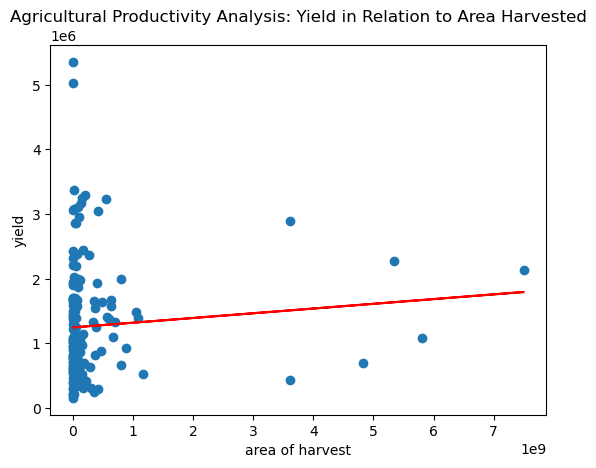

In [48]:
plt.scatter(X_train,y_train)
plt.plot(X_train,y_pred_train,color='red')
plt.title('Agricultural Productivity Analysis: Yield in Relation to Area Harvested')
plt.xlabel("area of harvest")
plt.ylabel("yield")

In [49]:
y_pred_test=lr.predict(X_test)
y_pred_test.flatten()

array([1250968.61467509, 1248145.8070374 , 1271862.35479697,
       1247074.99368458, 1247073.25237687, 1247510.28462159,
       1247926.41606342, 1251783.2864962 , 1259318.49762022,
       1251960.11530162, 1253061.10149018, 1247802.26721867,
       1247933.78493717, 1276583.60309275, 1247534.96684807,
       1249220.48182696, 1257542.07713631, 1247856.77434057,
       1249001.62473622, 1251857.92998894, 1251057.15329526,
       1248832.93748613, 1248347.52540261, 1247075.39579438,
       1252435.2562832 , 1247733.75480527, 1247072.07378925,
       1247559.06810328, 1248191.63032519, 1247065.22222669,
       1249162.78483842, 1247066.61566709, 1302362.42657723,
       1248801.97882798, 1249745.36243257, 1250431.27195097,
       1247116.85420513, 1248560.94284136, 1247630.60875096,
       1247804.61650939, 1251782.78948031])

Text(0, 0.5, 'yield')

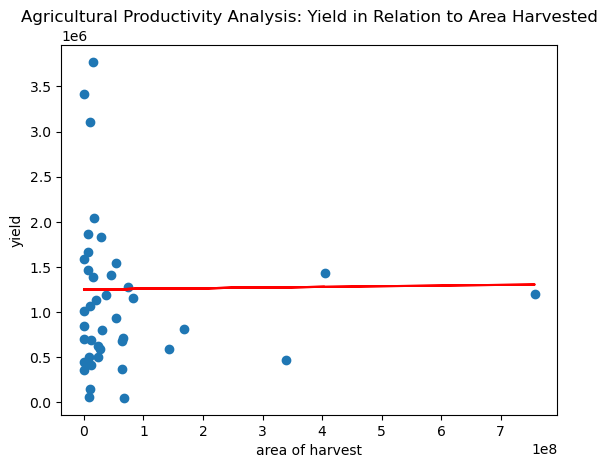

In [50]:
plt.scatter(X_test,y_test)
plt.plot(X_test,y_pred_test,color='red')
plt.title('Agricultural Productivity Analysis: Yield in Relation to Area Harvested')
plt.xlabel("area of harvest")
plt.ylabel("yield")